In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

df=pd.read_csv("wdbc.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
#Separate the features from the label
X, y = df.iloc[:, 2:], df.iloc[:, 1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

# 1.Random forest classifier

RF: accuracy_train= 0.9422 accuracy_test= 0.9006 recall= 0.7719 precision= 0.9167 AUROC= 0.9831


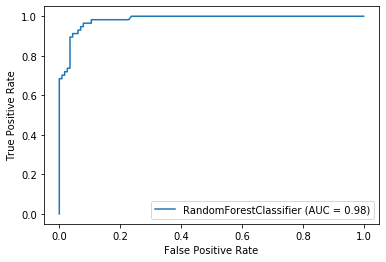

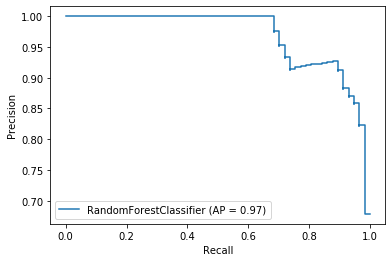

In [7]:
# Implement the Random forest classifier
acc_train,acc_test,rec,prc,auc = 0.0,0.0,0.0,0.0,0.0
clf = RandomForestClassifier(max_depth=1, random_state=10)
for i in range(0,20):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    y_pred_train=clf.predict(X_train)
    y_score=clf.predict_proba(X_test)[:,1]
    acc_train+=accuracy_score(y_train,y_pred_train)
    acc_test+=accuracy_score(y_test,y_pred)
    rec+=recall_score(y_test,y_pred,pos_label='M')
    prc+=precision_score(y_test,y_pred,pos_label='M')
    fpr,tpr,threshold = metrics.roc_curve(y_test, y_score, pos_label='M')
    auc+= metrics.roc_auc_score(y_test, y_score)
    
acc_train,acc_test,rec,prc,auc = np.around(acc_train/20,4), np.around(acc_test/20,4), np.around(rec/20,4),np.around(prc/20,4),np.around(auc/20,4)
print('RF: accuracy_train=',acc_train,'accuracy_test=',acc_test,'recall=',rec,'precision=',prc,"AUROC=",auc)
metrics.plot_roc_curve(clf, X_test, y_test)
metrics.plot_precision_recall_curve(clf, X_test, y_test)

# 2.SVM with rbf classifier

SVM with RBF kernel: accuracy_train= 0.9698 accuracy_test= 0.9474 recall= 0.9123 precision= 0.9286 AUROC= 0.9862


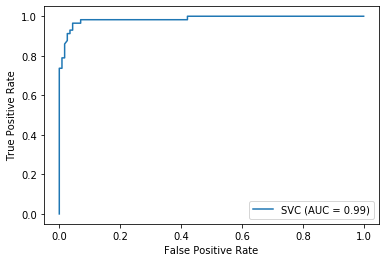

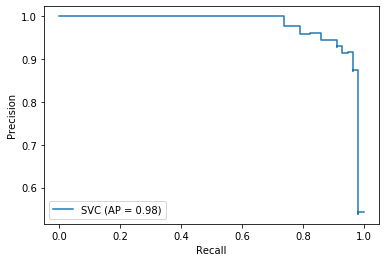

In [4]:
# Implement the Random forest classifier
acc_train,acc_test,rec,prc,auc = 0.0,0.0,0.0,0.0,0.0
clf = SVC(C=1e4, kernel='rbf', random_state=100, gamma='scale',probability=True)
for i in range(0,20):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    y_pred_train=clf.predict(X_train)
    y_score=clf.predict_proba(X_test)[:,1]
    acc_train+=accuracy_score(y_train,y_pred_train)
    acc_test+=accuracy_score(y_test,y_pred)
    rec+=recall_score(y_test,y_pred,pos_label='M')
    prc+=precision_score(y_test,y_pred,pos_label='M')
    fpr,tpr,threshold = metrics.roc_curve(y_test, y_score, pos_label='M')
    auc+= metrics.roc_auc_score(y_test, y_score)
    
acc_train,acc_test,rec,prc,auc = np.around(acc_train/20,4), np.around(acc_test/20,4), np.around(rec/20,4),np.around(prc/20,4),np.around(auc/20,4)
print('SVM with RBF kernel: accuracy_train=',acc_train,'accuracy_test=',acc_test,'recall=',rec,'precision=',prc,"AUROC=",auc)
metrics.plot_roc_curve(clf, X_test, y_test)
metrics.plot_precision_recall_curve(clf, X_test, y_test)

# 3.MLP classifier

MLP: accuracy_train= 0.9497 accuracy_test= 0.9357 recall= 0.9123 precision= 0.8966 AUROC= 0.9826


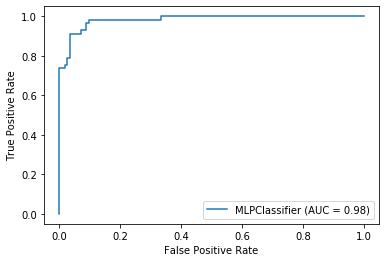

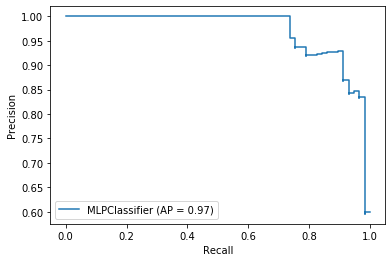

In [6]:
# Implement the MLP classifier

acc_train,acc_test,rec,prc,auc = 0.0,0.0,0.0,0.0,0.0
mlp = MLPClassifier(hidden_layer_sizes=(10,),activation='tanh',max_iter=10000,random_state=np.random.randint(1,10))
for i in range(0,20):
    mlp.fit(X_train, y_train)
    y_pred=mlp.predict(X_test)
    y_pred_train=mlp.predict(X_train)
    y_score=mlp.predict_proba(X_test)[:,1]
    acc_train+=accuracy_score(y_train,y_pred_train)
    acc_test+=accuracy_score(y_test,y_pred)
    rec+=recall_score(y_test,y_pred,pos_label='M')
    prc+=precision_score(y_test,y_pred,pos_label='M')
    fpr,tpr,threshold = metrics.roc_curve(y_test, y_score, pos_label='M')
    auc+= metrics.roc_auc_score(y_test, y_score)
    
acc_train,acc_test,rec,prc,auc = np.around(acc_train/20,4), np.around(acc_test/20,4), np.around(rec/20,4),np.around(prc/20,4),np.around(auc/20,4)
print('MLP: accuracy_train=',acc_train,'accuracy_test=',acc_test,'recall=',rec,'precision=',prc,"AUROC=",auc)
metrics.plot_roc_curve(mlp, X_test, y_test)
metrics.plot_precision_recall_curve(mlp, X_test, y_test)